In [1]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


# Importing Data

In [2]:
BBB_Train = pd.read_csv("BBB_LSTM_Input_Train.csv", index_col=0)
DDD_Train = pd.read_csv("DDD_LSTM_Input_Train.csv", index_col=0)
FFF_Train = pd.read_csv("FFF_LSTM_Input_Train.csv", index_col=0)

BBB_Test = pd.read_csv("BBB_LSTM_Input_Test.csv", index_col=0)
DDD_Test = pd.read_csv("DDD_LSTM_Input_Test.csv", index_col=0)
FFF_Test = pd.read_csv("FFF_LSTM_Input_Test.csv", index_col=0)

BBB_AUX_Train = pd.read_csv("BBB_LSTM_AUX_Train.csv", index_col=0)
DDD_AUX_Train = pd.read_csv("DDD_LSTM_AUX_Train.csv", index_col=0)
FFF_AUX_Train = pd.read_csv("FFF_LSTM_AUX_Train.csv", index_col=0)

BBB_AUX_Test = pd.read_csv("BBB_LSTM_AUX_Test.csv", index_col=0)
DDD_AUX_Test = pd.read_csv("DDD_LSTM_AUX_Test.csv", index_col=0)
FFF_AUX_Test = pd.read_csv("FFF_LSTM_AUX_Test.csv", index_col=0)


# Transforming Data

#### Normalize variables for every course  per semester

In [3]:
BBB_Train.head()

,id_student,code_presentation,Decile,Avg_Clicks,Asgmts,Avg_Asgmt_Score,final_result
1,1008675,2013B,0,2.181818,0,0.000000,Pass
2,1008675,2013B,1,12.391304,1,70.000000,Pass
4,1008675,2013B,2,12.875000,1,65.000000,Pass
5,1008675,2013B,3,7.250000,1,56.666667,Pass
6,1008675,2013B,4,5.166667,1,55.250000,Pass


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
Semesters_Train = BBB_Train.code_presentation.unique()
dfs_Train = list([BBB_Train, DDD_Train, FFF_Train])
Semesters_Test = BBB_Test.code_presentation.unique()
dfs_Test = list([BBB_Test, DDD_Test, FFF_Test])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

for i in range(0,len(dfs_Train)):
    for j in range(0,len(Semesters_Train)):
        scaler.fit(dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"])
        dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"] = scaler.transform(dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"])


for i in range(0,len(dfs_Test)):
    for j in range(0,len(Semesters_Test)):
        scaler.fit(dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"])
        dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"] = scaler.transform(dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"])

In [7]:
BBB_Train.head()

,id_student,code_presentation,Decile,Avg_Clicks,Asgmts,Avg_Asgmt_Score,final_result
1,1008675,2013B,0,0.019416,0.000000,0.000000,Pass
2,1008675,2013B,1,0.110267,0.142857,0.700000,Pass
4,1008675,2013B,2,0.114572,0.142857,0.650000,Pass
5,1008675,2013B,3,0.064516,0.142857,0.566667,Pass
6,1008675,2013B,4,0.045977,0.142857,0.552500,Pass


#### Take subset of the data to use as auxiliary input for the LSTM models

In [8]:
BBB_AUX_Train.head()

,code_module,code_presentation,id_student,num_of_prev_attempts,studied_credits,gender_F,gender_M,highest_education_Lower Than A Level,highest_education_A Level or Equivalent,highest_education_HE Qualification,...,imd_band_80-90%,age_band_35-55,age_band_0-35,age_band_55<=,disability_N,disability_Y,year_2013,year_2014,semester_B,semester_J
2346,BBB,2013B,1008675,0.0,0.000000,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
794,BBB,2013B,104054,0.0,0.222222,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
795,BBB,2013B,108377,0.0,0.222222,1,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
796,BBB,2013B,108589,0.0,0.000000,1,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
2347,BBB,2013B,1098728,0.0,0.222222,1,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [9]:
BBB_AUX_Train = BBB_AUX_Train.iloc[:,3:33]
DDD_AUX_Train = DDD_AUX_Train.iloc[:,3:33]
FFF_AUX_Train = FFF_AUX_Train.iloc[:,3:33]

BBB_AUX_Test = BBB_AUX_Test.iloc[:,3:33]
DDD_AUX_Test = DDD_AUX_Test.iloc[:,3:33]
FFF_AUX_Test = FFF_AUX_Test.iloc[:,3:33]

In [10]:
print(BBB_AUX_Train.shape)
print(DDD_AUX_Train.shape)
print(FFF_AUX_Train.shape)

print(BBB_AUX_Test.shape)
print(DDD_AUX_Test.shape)
print(FFF_AUX_Test.shape)

(3978, 29)
(2866, 29)
(3849, 29)
(1543, 29)
(1156, 29)
(1510, 29)


#### Make a 1D array of target labels (pass w distinction / pass / fail)

In [11]:
BBB_Train_Targets = BBB_Train["final_result"][0::11]
DDD_Train_Targets = DDD_Train["final_result"][0::11]
FFF_Train_Targets = FFF_Train["final_result"][0::11]

BBB_Test_Targets = BBB_Test["final_result"][0::11]
DDD_Test_Targets = DDD_Test["final_result"][0::11]
FFF_Test_Targets = FFF_Test["final_result"][0::11]

In [12]:
FFF_Train_Targets.head(n=10)

104974           Fail
104985           Pass
104996           Fail
105007    Distinction
105018           Pass
105029           Pass
105040           Fail
105051           Pass
105062           Fail
105073           Pass
Name: final_result, dtype: object

In [13]:
BBB_Train_Targets_1HE = np.array(pd.get_dummies(BBB_Train_Targets))
DDD_Train_Targets_1HE = np.array(pd.get_dummies(DDD_Train_Targets))
FFF_Train_Targets_1HE = np.array(pd.get_dummies(FFF_Train_Targets))

BBB_Test_Targets_1HE = np.array(pd.get_dummies(BBB_Test_Targets))
DDD_Test_Targets_1HE = np.array(pd.get_dummies(DDD_Test_Targets))
FFF_Test_Targets_1HE = np.array(pd.get_dummies(FFF_Test_Targets))


In [14]:
BBB_Train_Targets_1D = np.array(BBB_Train_Targets)
DDD_Train_Targets_1D = np.array(DDD_Train_Targets)
FFF_Train_Targets_1D = np.array(FFF_Train_Targets)

BBB_Test_Targets_1D = np.array(BBB_Test_Targets)
DDD_Test_Targets_1D = np.array(DDD_Test_Targets)
FFF_Test_Targets_1D = np.array(FFF_Test_Targets)

#### 1-Hot Encode the target labels

In [15]:
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Fail"] = 1
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Pass"] = 2
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Distinction"] = 0

DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Fail"] = 1
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Pass"] = 2
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Distinction"] = 0

FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Fail"] = 1
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Pass"] = 2
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Distinction"] = 0

BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Fail"] = 1
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Pass"] = 2
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Distinction"] = 0

DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Fail"] = 1
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Pass"] = 2
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Distinction"] = 0

FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Fail"] = 1
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Pass"] = 2
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Distinction"] = 0

In [16]:
BBB_Train_Targets_1D = BBB_Train_Targets_1D.astype('int64')
DDD_Train_Targets_1D = DDD_Train_Targets_1D.astype('int64')
FFF_Train_Targets_1D = FFF_Train_Targets_1D.astype('int64')

BBB_Test_Targets_1D = BBB_Test_Targets_1D.astype('int64')
DDD_Test_Targets_1D = DDD_Test_Targets_1D.astype('int64')
FFF_Test_Targets_1D = FFF_Test_Targets_1D.astype('int64')

In [17]:
BBB_Train_Targets_1HE

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ..., 
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [18]:
print(FFF_Train_Targets_1D.shape)

(3849,)


In [19]:
FFF_Train_Targets_1D

array([1, 2, 1, ..., 2, 2, 1], dtype=int64)

#### Keep only the relevant variables to use as input for the LSTM model (cut out course, semester, id and decile)

In [20]:
BBB_Train_df = BBB_Train.iloc[:,3:6]
DDD_Train_df = DDD_Train.iloc[:,3:6]
FFF_Train_df = FFF_Train.iloc[:,3:6]

BBB_Test_df = BBB_Test.iloc[:,3:6]
DDD_Test_df = DDD_Test.iloc[:,3:6]
FFF_Test_df = FFF_Test.iloc[:,3:6]

In [21]:
FFF_Train_df.head(n=20)

,Avg_Clicks,Asgmts,Avg_Asgmt_Score
104974,0.010130,0.000,0.000000
104975,0.109139,0.125,0.700000
104977,0.003323,0.000,0.700000
104978,0.003323,0.000,0.700000
104979,0.032648,0.000,0.700000
104980,0.005669,0.125,0.490000
104981,0.000000,0.000,0.490000
104982,0.000000,0.000,0.490000
104983,0.000000,0.000,0.490000
104984,0.000000,0.000,0.490000


In [22]:
BBB_AUX_Train = np.array(BBB_AUX_Train)
DDD_AUX_Train = np.array(DDD_AUX_Train)
FFF_AUX_Train = np.array(FFF_AUX_Train)

BBB_AUX_Test = np.array(BBB_AUX_Test)
DDD_AUX_Test = np.array(DDD_AUX_Test)
FFF_AUX_Test = np.array(FFF_AUX_Test)

In [23]:
BBB_AUX_Train.shape

(3978, 29)

Number of students in the courses across all 4 semesters

In [24]:
print("BBB Train\n")
print(BBB_Train_df.count()/11,"\n")

print("DDD Train\n")
print(DDD_Train_df.count()/11,"\n")

print("FFF Train\n")
print(FFF_Train_df.count()/11,"\n")

print("BBB Test\n")
print(BBB_Test_df.count()/11,"\n")

print("DDD Test\n")
print(DDD_Test_df.count()/11,"\n")

print("FFF Test\n")
print(FFF_Test_df.count()/11,"\n")

BBB Train

Avg_Clicks         3978.0
Asgmts             3978.0
Avg_Asgmt_Score    3978.0
dtype: float64 

DDD Train

Avg_Clicks         2866.0
Asgmts             2866.0
Avg_Asgmt_Score    2866.0
dtype: float64 

FFF Train

Avg_Clicks         3849.0
Asgmts             3849.0
Avg_Asgmt_Score    3849.0
dtype: float64 

BBB Test

Avg_Clicks         1543.0
Asgmts             1543.0
Avg_Asgmt_Score    1543.0
dtype: float64 

DDD Test

Avg_Clicks         1156.0
Asgmts             1156.0
Avg_Asgmt_Score    1156.0
dtype: float64 

FFF Test

Avg_Clicks         1510.0
Asgmts             1510.0
Avg_Asgmt_Score    1510.0
dtype: float64 



#### Convert dataframes into 2D arrays

In [25]:
BBB_Train_2D = BBB_Train_df.values
DDD_Train_2D = DDD_Train_df.values
FFF_Train_2D = FFF_Train_df.values

BBB_Test_2D = BBB_Test_df.values
DDD_Test_2D = DDD_Test_df.values
FFF_Test_2D = FFF_Test_df.values

#### Reshape 2D arrays to 3D arrays necessary for LSTM
Format : samples (students), timesteps (deciles), features (clicks & assignments)

In [26]:
BBB_Train_3D = BBB_Train_2D.reshape(int(BBB_Train_df["Asgmts"].count()/11),11,len(BBB_Train_df.columns))
DDD_Train_3D = DDD_Train_2D.reshape(int(DDD_Train_df["Asgmts"].count()/11),11,len(DDD_Train_df.columns))
FFF_Train_3D = FFF_Train_2D.reshape(int(FFF_Train_df["Asgmts"].count()/11),11,len(FFF_Train_df.columns))

BBB_Test_3D = BBB_Test_2D.reshape(int(BBB_Test_df["Asgmts"].count()/11),11,len(BBB_Test_df.columns))
DDD_Test_3D = DDD_Test_2D.reshape(int(DDD_Test_df["Asgmts"].count()/11),11,len(DDD_Test_df.columns))
FFF_Test_3D = FFF_Test_2D.reshape(int(FFF_Test_df["Asgmts"].count()/11),11,len(FFF_Test_df.columns))


In [27]:
print(FFF_Train_3D.shape)

(3849, 11, 3)


#### Exclude timestep(s) in sequences to be able to build the models for multiple points in time

In [28]:
BBB_Train_3D_Decile9 = np.delete(BBB_Train_3D,-1,axis=1)
BBB_Train_3D_Decile8 = np.delete(BBB_Train_3D,np.s_[-2:],axis=1)
BBB_Train_3D_Decile7 = np.delete(BBB_Train_3D,np.s_[-3:],axis=1)
BBB_Train_3D_Decile6 = np.delete(BBB_Train_3D,np.s_[-4:],axis=1)
BBB_Train_3D_Decile5 = np.delete(BBB_Train_3D,np.s_[-5:],axis=1)
BBB_Train_3D_Decile4 = np.delete(BBB_Train_3D,np.s_[-6:],axis=1)
BBB_Train_3D_Decile3 = np.delete(BBB_Train_3D,np.s_[-7:],axis=1)
BBB_Train_3D_Decile2 = np.delete(BBB_Train_3D,np.s_[-8:],axis=1)
BBB_Train_3D_Decile1 = np.delete(BBB_Train_3D,np.s_[-9:],axis=1)
BBB_Train_3D_Decile0 = np.delete(BBB_Train_3D,np.s_[-10:],axis=1)

BBB_Test_3D_Decile9 = np.delete(BBB_Test_3D,-1,axis=1)
BBB_Test_3D_Decile8 = np.delete(BBB_Test_3D,np.s_[-2:],axis=1)
BBB_Test_3D_Decile7 = np.delete(BBB_Test_3D,np.s_[-3:],axis=1)
BBB_Test_3D_Decile6 = np.delete(BBB_Test_3D,np.s_[-4:],axis=1)
BBB_Test_3D_Decile5 = np.delete(BBB_Test_3D,np.s_[-5:],axis=1)
BBB_Test_3D_Decile4 = np.delete(BBB_Test_3D,np.s_[-6:],axis=1)
BBB_Test_3D_Decile3 = np.delete(BBB_Test_3D,np.s_[-7:],axis=1)
BBB_Test_3D_Decile2 = np.delete(BBB_Test_3D,np.s_[-8:],axis=1)
BBB_Test_3D_Decile1 = np.delete(BBB_Test_3D,np.s_[-9:],axis=1)
BBB_Test_3D_Decile0 = np.delete(BBB_Test_3D,np.s_[-10:],axis=1)

In [29]:
DDD_Train_3D_Decile9 = np.delete(DDD_Train_3D,-1,axis=1)
DDD_Train_3D_Decile8 = np.delete(DDD_Train_3D,np.s_[-2:],axis=1)
DDD_Train_3D_Decile7 = np.delete(DDD_Train_3D,np.s_[-3:],axis=1)
DDD_Train_3D_Decile6 = np.delete(DDD_Train_3D,np.s_[-4:],axis=1)
DDD_Train_3D_Decile5 = np.delete(DDD_Train_3D,np.s_[-5:],axis=1)
DDD_Train_3D_Decile4 = np.delete(DDD_Train_3D,np.s_[-6:],axis=1)
DDD_Train_3D_Decile3 = np.delete(DDD_Train_3D,np.s_[-7:],axis=1)
DDD_Train_3D_Decile2 = np.delete(DDD_Train_3D,np.s_[-8:],axis=1)
DDD_Train_3D_Decile1 = np.delete(DDD_Train_3D,np.s_[-9:],axis=1)
DDD_Train_3D_Decile0 = np.delete(DDD_Train_3D,np.s_[-10:],axis=1)

DDD_Test_3D_Decile9 = np.delete(DDD_Test_3D,-1,axis=1)
DDD_Test_3D_Decile8 = np.delete(DDD_Test_3D,np.s_[-2:],axis=1)
DDD_Test_3D_Decile7 = np.delete(DDD_Test_3D,np.s_[-3:],axis=1)
DDD_Test_3D_Decile6 = np.delete(DDD_Test_3D,np.s_[-4:],axis=1)
DDD_Test_3D_Decile5 = np.delete(DDD_Test_3D,np.s_[-5:],axis=1)
DDD_Test_3D_Decile4 = np.delete(DDD_Test_3D,np.s_[-6:],axis=1)
DDD_Test_3D_Decile3 = np.delete(DDD_Test_3D,np.s_[-7:],axis=1)
DDD_Test_3D_Decile2 = np.delete(DDD_Test_3D,np.s_[-8:],axis=1)
DDD_Test_3D_Decile1 = np.delete(DDD_Test_3D,np.s_[-9:],axis=1)
DDD_Test_3D_Decile0 = np.delete(DDD_Test_3D,np.s_[-10:],axis=1)

In [30]:
FFF_Train_3D_Decile9 = np.delete(FFF_Train_3D,-1,axis=1)
FFF_Train_3D_Decile8 = np.delete(FFF_Train_3D,np.s_[-2:],axis=1)
FFF_Train_3D_Decile7 = np.delete(FFF_Train_3D,np.s_[-3:],axis=1)
FFF_Train_3D_Decile6 = np.delete(FFF_Train_3D,np.s_[-4:],axis=1)
FFF_Train_3D_Decile5 = np.delete(FFF_Train_3D,np.s_[-5:],axis=1)
FFF_Train_3D_Decile4 = np.delete(FFF_Train_3D,np.s_[-6:],axis=1)
FFF_Train_3D_Decile3 = np.delete(FFF_Train_3D,np.s_[-7:],axis=1)
FFF_Train_3D_Decile2 = np.delete(FFF_Train_3D,np.s_[-8:],axis=1)
FFF_Train_3D_Decile1 = np.delete(FFF_Train_3D,np.s_[-9:],axis=1)
FFF_Train_3D_Decile0 = np.delete(FFF_Train_3D,np.s_[-10:],axis=1)

FFF_Test_3D_Decile9 = np.delete(FFF_Test_3D,-1,axis=1)
FFF_Test_3D_Decile8 = np.delete(FFF_Test_3D,np.s_[-2:],axis=1)
FFF_Test_3D_Decile7 = np.delete(FFF_Test_3D,np.s_[-3:],axis=1)
FFF_Test_3D_Decile6 = np.delete(FFF_Test_3D,np.s_[-4:],axis=1)
FFF_Test_3D_Decile5 = np.delete(FFF_Test_3D,np.s_[-5:],axis=1)
FFF_Test_3D_Decile4 = np.delete(FFF_Test_3D,np.s_[-6:],axis=1)
FFF_Test_3D_Decile3 = np.delete(FFF_Test_3D,np.s_[-7:],axis=1)
FFF_Test_3D_Decile2 = np.delete(FFF_Test_3D,np.s_[-8:],axis=1)
FFF_Test_3D_Decile1 = np.delete(FFF_Test_3D,np.s_[-9:],axis=1)
FFF_Test_3D_Decile0 = np.delete(FFF_Test_3D,np.s_[-10:],axis=1)

# LSTM

In [31]:
from sklearn.metrics import classification_report
from keras import Sequential
from keras.layers import Input,Embedding, LSTM, Dense
from keras.models import Model
from keras.optimizers import SGD
from matplotlib import pyplot
np.random.seed(7)
%matplotlib inline
#np.set_printoptions(threshold=np.nan)

## LSTM Course BBB

In [32]:
Deciles = np.arange(11)
BBB_model_names = ["modelBBB0", "modelBBB1", "modelBBB2", "modelBBB3", "modelBBB4", "modelBBB5",
                   "modelBBB6", "modelBBB7", "modelBBB8", "modelBBB9", "modelBBB10"]
BBB_names = ["BBB0", "BBB1", "BBB2", "BBB3", "BBB4", "BBB5", "BBB6", "BBB7", "BBB8", "BBB9", "BBB10"]
BBB_Train_set = [BBB_Train_3D_Decile0,BBB_Train_3D_Decile1,BBB_Train_3D_Decile2,BBB_Train_3D_Decile3,BBB_Train_3D_Decile4,
                 BBB_Train_3D_Decile5,BBB_Train_3D_Decile6,BBB_Train_3D_Decile7,BBB_Train_3D_Decile8,BBB_Train_3D_Decile9,
                 BBB_Train_3D]
BBB_Test_set = [BBB_Test_3D_Decile0,BBB_Test_3D_Decile1,BBB_Test_3D_Decile2,BBB_Test_3D_Decile3,BBB_Test_3D_Decile4,
                 BBB_Test_3D_Decile5,BBB_Test_3D_Decile6,BBB_Test_3D_Decile7,BBB_Test_3D_Decile8,BBB_Test_3D_Decile9,
                 BBB_Test_3D]

Fit LSTM Course BBB - 3 Target Classes - Decile0
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 41s 10ms/step - loss: 0.9442 - acc: 0.5231 - val_loss: 0.9278 - val_acc: 0.5347
Epoch 2/15
3978/3978 [==============================] - 1s 324us/step - loss: 0.9236 - acc: 0.5387 - val_loss: 0.8782 - val_acc: 0.6293
Epoch 3/15
3978/3978 [==============================] - 1s 332us/step - loss: 0.9137 - acc: 0.5535 - val_loss: 0.8823 - val_acc: 0.6222
Epoch 4/15
3978/3978 [==============================] - 1s 328us/step - loss: 0.9071 - acc: 0.5543 - val_loss: 0.9136 - val_acc: 0.5587
Epoch 5/15
3978/3978 [==============================] - 1s 327us/step - loss: 0.9041 - acc: 0.5598 - val_loss: 0.8782 - val_acc: 0.6137
Epoch 6/15
3978/3978 [==============================] - 1s 328us/step - loss: 0.8967 - acc: 0.5606 - val_loss: 0.9127 - val_acc: 0.5625
Epoch 7/15
3978/3978 [==============================] - 1s 328us/step - loss: 0.8902 - 

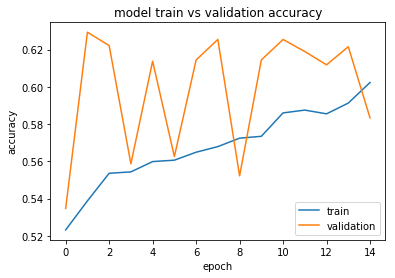

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.27      0.08      0.12       180
          1       0.38      0.30      0.34       391
          2       0.65      0.79      0.71       972

avg / total       0.54      0.58      0.55      1543

Fit LSTM Course BBB - 3 Target Classes - Decile1
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 24s 6ms/step - loss: 0.9339 - acc: 0.5490 - val_loss: 0.8999 - val_acc: 0.5768
Epoch 2/15
3978/3978 [==============================] - 1s 333us/step - loss: 0.8466 - acc: 0.6086 - val_loss: 0.9969 - val_acc: 0.5198
Epoch 3/15
3978/3978 [==============================] - 1s 330us/step - loss: 0.8197 - acc: 0.6252 - val_loss: 1.1856 - val_acc: 0.5062
Epoch 4/15
3978/3978 [========================

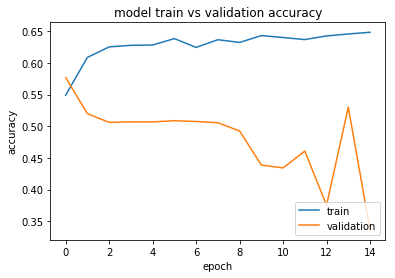

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.14      0.48      0.22       180
          1       0.33      0.45      0.38       391
          2       0.63      0.27      0.37       972

avg / total       0.50      0.34      0.36      1543

Fit LSTM Course BBB - 3 Target Classes - Decile2
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 24s 6ms/step - loss: 0.9182 - acc: 0.5646 - val_loss: 0.9281 - val_acc: 0.5580
Epoch 2/15
3978/3978 [==============================] - 1s 341us/step - loss: 0.8280 - acc: 0.6305 - val_loss: 1.0069 - val_acc: 0.5664
Epoch 3/15
3978/3978 [==============================] - 1s 345us/step - loss: 0.8032 - acc: 0.6302 - val_loss: 1.1505 - val_acc: 0.5489
Epoch 4/15
3978/3978 [========================

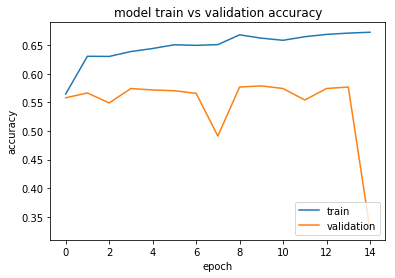

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.14      0.57      0.23       180
          1       0.36      0.44      0.40       391
          2       0.67      0.24      0.35       972

avg / total       0.53      0.33      0.35      1543

Fit LSTM Course BBB - 3 Target Classes - Decile3
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 24s 6ms/step - loss: 0.9130 - acc: 0.5762 - val_loss: 1.0019 - val_acc: 0.5159
Epoch 2/15
3978/3978 [==============================] - 1s 351us/step - loss: 0.8157 - acc: 0.6320 - val_loss: 1.1745 - val_acc: 0.5100
Epoch 3/15
3978/3978 [==============================] - 1s 353us/step - loss: 0.7845 - acc: 0.6448 - val_loss: 1.5410 - val_acc: 0.4984
Epoch 4/15
3978/3978 [========================

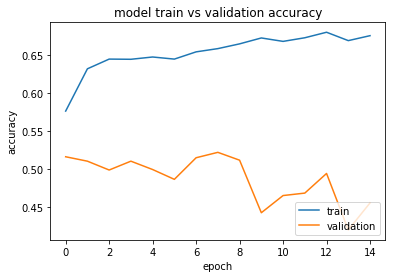

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.22      0.37      0.28       180
          1       0.33      0.51      0.40       391
          2       0.68      0.45      0.54       972

avg / total       0.54      0.45      0.47      1543

Fit LSTM Course BBB - 3 Target Classes - Decile4
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 24s 6ms/step - loss: 0.8822 - acc: 0.5933 - val_loss: 1.0511 - val_acc: 0.5120
Epoch 2/15
3978/3978 [==============================] - 1s 364us/step - loss: 0.7716 - acc: 0.6478 - val_loss: 1.4147 - val_acc: 0.5107
Epoch 3/15
3978/3978 [==============================] - 1s 357us/step - loss: 0.7422 - acc: 0.6662 - val_loss: 1.1977 - val_acc: 0.5191
Epoch 4/15
3978/3978 [========================

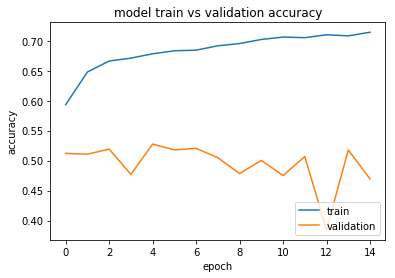

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.32      0.11      0.16       180
          1       0.33      0.74      0.45       391
          2       0.69      0.43      0.53       972

avg / total       0.56      0.47      0.47      1543

Fit LSTM Course BBB - 3 Target Classes - Decile5
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 25s 6ms/step - loss: 0.8737 - acc: 0.6106 - val_loss: 1.1041 - val_acc: 0.5178
Epoch 2/15
3978/3978 [==============================] - 1s 365us/step - loss: 0.7579 - acc: 0.6549 - val_loss: 0.9741 - val_acc: 0.6384
Epoch 3/15
3978/3978 [==============================] - 1s 376us/step - loss: 0.7354 - acc: 0.6654 - val_loss: 1.0326 - val_acc: 0.3694
Epoch 4/15
3978/3978 [========================

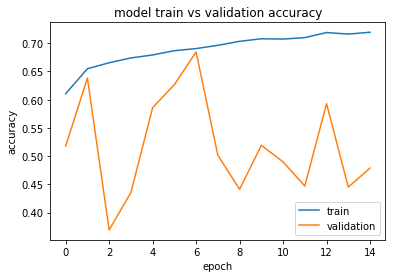

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.16      0.56      0.25       180
          1       0.90      0.32      0.47       391
          2       0.66      0.53      0.59       972

avg / total       0.66      0.48      0.52      1543

Fit LSTM Course BBB - 3 Target Classes - Decile6
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 24s 6ms/step - loss: 0.8748 - acc: 0.6011 - val_loss: 0.9346 - val_acc: 0.5988
Epoch 2/15
3978/3978 [==============================] - 1s 364us/step - loss: 0.7600 - acc: 0.6541 - val_loss: 1.0439 - val_acc: 0.5470
Epoch 3/15
3978/3978 [==============================] - 1s 366us/step - loss: 0.7257 - acc: 0.6692 - val_loss: 1.1444 - val_acc: 0.5075
Epoch 4/15
3978/3978 [========================

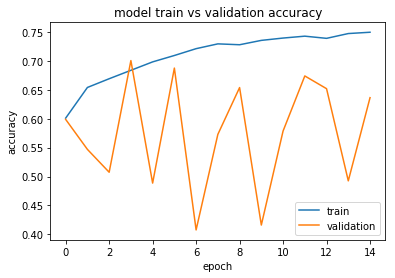

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.27      0.46      0.34       180
          1       0.90      0.38      0.54       391
          2       0.70      0.77      0.74       972

avg / total       0.70      0.64      0.64      1543

Fit LSTM Course BBB - 3 Target Classes - Decile7
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 24s 6ms/step - loss: 0.8433 - acc: 0.6217 - val_loss: 1.1592 - val_acc: 0.5126
Epoch 2/15
3978/3978 [==============================] - 1s 373us/step - loss: 0.7077 - acc: 0.6858 - val_loss: 0.9326 - val_acc: 0.6429
Epoch 3/15
3978/3978 [==============================] - 1s 376us/step - loss: 0.6597 - acc: 0.7147 - val_loss: 0.9525 - val_acc: 0.5645
Epoch 4/15
3978/3978 [========================

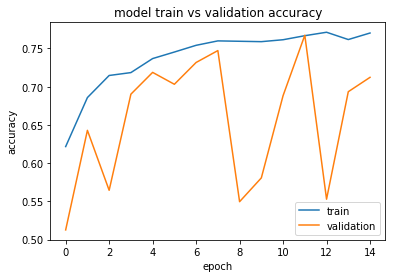

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.49      0.14      0.22       180
          1       1.00      0.32      0.49       391
          2       0.69      0.97      0.81       972

avg / total       0.75      0.71      0.66      1543

Fit LSTM Course BBB - 3 Target Classes - Decile8
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 24s 6ms/step - loss: 0.8102 - acc: 0.6430 - val_loss: 0.8674 - val_acc: 0.6494
Epoch 2/15
3978/3978 [==============================] - 2s 382us/step - loss: 0.6864 - acc: 0.6941 - val_loss: 0.8571 - val_acc: 0.6487
Epoch 3/15
3978/3978 [==============================] - 2s 382us/step - loss: 0.6285 - acc: 0.7283 - val_loss: 0.7817 - val_acc: 0.7155
Epoch 4/15
3978/3978 [========================

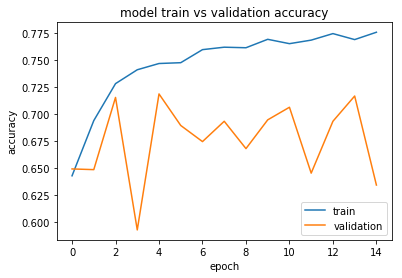

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.28      0.51      0.36       180
          1       0.98      0.32      0.48       391
          2       0.70      0.78      0.74       972

avg / total       0.72      0.63      0.63      1543

Fit LSTM Course BBB - 3 Target Classes - Decile9
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 24s 6ms/step - loss: 0.8249 - acc: 0.6264 - val_loss: 0.8525 - val_acc: 0.6241
Epoch 2/15
3978/3978 [==============================] - 2s 399us/step - loss: 0.6771 - acc: 0.6978 - val_loss: 0.8833 - val_acc: 0.6371
Epoch 3/15
3978/3978 [==============================] - 2s 400us/step - loss: 0.6324 - acc: 0.7182 - val_loss: 0.8857 - val_acc: 0.5360
Epoch 4/15
3978/3978 [========================

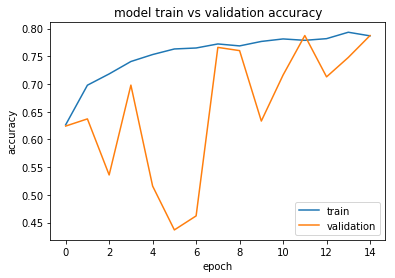

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.55      0.27      0.36       180
          1       1.00      0.60      0.75       391
          2       0.76      0.96      0.85       972

avg / total       0.80      0.79      0.77      1543

Fit LSTM Course BBB - 3 Target Classes - Decile10
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 24s 6ms/step - loss: 0.8204 - acc: 0.6408 - val_loss: 0.7576 - val_acc: 0.6986
Epoch 2/15
3978/3978 [==============================] - 2s 422us/step - loss: 0.6648 - acc: 0.7172 - val_loss: 0.6873 - val_acc: 0.7427
Epoch 3/15
3978/3978 [==============================] - 2s 415us/step - loss: 0.6272 - acc: 0.7338 - val_loss: 0.8649 - val_acc: 0.7058
Epoch 4/15
3978/3978 [=======================

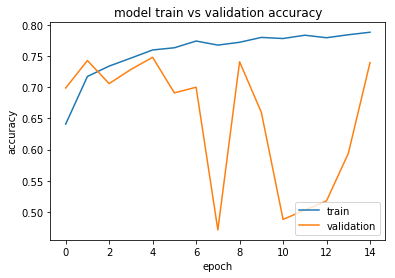

-------------------------------------------
Test LSTM Course BBB - 3 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.51      0.19      0.28       180
          1       1.00      0.43      0.60       391
          2       0.72      0.97      0.82       972

avg / total       0.77      0.74      0.70      1543



In [53]:
for i in Deciles:
    
    LSTM_input = Input(shape=(i+1,3), name='LSTM_input')
    LSTM_out = LSTM(32)(LSTM_input)

    auxiliary_input = Input(shape=(29,), name='aux_input')
    auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
    auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

    x = keras.layers.concatenate([LSTM_out, auxiliary_output])

    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    main_output = Dense(3, activation='softmax', name='main_output')(x)

    BBB_model_names[i] = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
    BBB_model_names[i].compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics = ['accuracy'])
    
     # Fit model for each timestep
    #ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course BBB - 3 Target Classes - Decile' + str(i))
    
    history = BBB_model_names[i].fit([BBB_Train_set[i],BBB_AUX_Train], BBB_Train_Targets_1HE, epochs=15, batch_size=32, verbose=1,
                                     validation_data = ([BBB_Test_set[i], BBB_AUX_Test], BBB_Test_Targets_1HE))
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    y_pred_BBB = BBB_model_names[i].predict([BBB_Test_set[i], BBB_AUX_Test])
    y_classes_BBB = np.argmax(y_pred_BBB,axis=1)

    
    print('-------------------------------------------')
    print('Test LSTM Course BBB - 3 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
    print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))
    

## LSTM Course DDD

In [48]:
Deciles = np.arange(11)
DDD_model_names = ["modelDDD0", "modelDDD1", "modelDDD2", "modelDDD3", "modelDDD4", "modelDDD5",
                   "modelDDD6", "modelDDD7", "modelDDD8", "modelDDD9", "modelDDD10"]
DDD_names = ["DDD0", "DDD1", "DDD2", "DDD3", "DDD4", "DDD5", "DDD6", "DDD7", "DDD8", "DDD9", "DDD10"]
DDD_Train_set = [DDD_Train_3D_Decile0,DDD_Train_3D_Decile1,DDD_Train_3D_Decile2,DDD_Train_3D_Decile3,DDD_Train_3D_Decile4,
                 DDD_Train_3D_Decile5,DDD_Train_3D_Decile6,DDD_Train_3D_Decile7,DDD_Train_3D_Decile8,DDD_Train_3D_Decile9,
                 DDD_Train_3D]
DDD_Test_set = [DDD_Test_3D_Decile0,DDD_Test_3D_Decile1,DDD_Test_3D_Decile2,DDD_Test_3D_Decile3,DDD_Test_3D_Decile4,
                 DDD_Test_3D_Decile5,DDD_Test_3D_Decile6,DDD_Test_3D_Decile7,DDD_Test_3D_Decile8,DDD_Test_3D_Decile9,
                 DDD_Test_3D]

Fit LSTM Course DDD - 3 Target Classes - Decile0
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 18s 6ms/step - loss: 0.9202 - acc: 0.5475 - val_loss: 0.9426 - val_acc: 0.5891
Epoch 2/4000
2866/2866 [==============================] - 11s 4ms/step - loss: 0.8889 - acc: 0.5565 - val_loss: 0.9063 - val_acc: 0.5882
Epoch 3/4000
2866/2866 [==============================] - 11s 4ms/step - loss: 0.8836 - acc: 0.5583 - val_loss: 0.9462 - val_acc: 0.5934
Epoch 4/4000
2866/2866 [==============================] - 11s 4ms/step - loss: 0.8752 - acc: 0.5670 - val_loss: 0.9242 - val_acc: 0.5900
Epoch 5/4000
2866/2866 [==============================] - 11s 4ms/step - loss: 0.8630 - acc: 0.5729 - val_loss: 0.9322 - val_acc: 0.5995
Epoch 6/4000
2866/2866 [==============================] - 11s 4ms/step - loss: 0.8603 - acc: 0.5897 - val_loss: 0.9382 - val_acc: 0.5536
Epoch 7/4000
2866/2866 [==============================] - 11s 4ms/step - loss: 0.

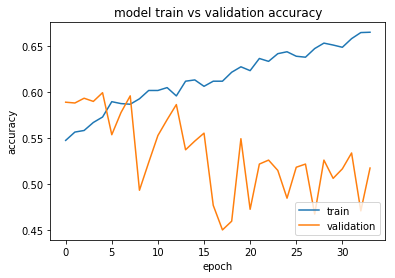

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.07      0.07      0.07       112
          1       0.44      0.24      0.31       364
          2       0.59      0.74      0.66       680

avg / total       0.49      0.52      0.49      1156

Fit LSTM Course DDD - 3 Target Classes - Decile1
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 19s 7ms/step - loss: 0.8740 - acc: 0.5729 - val_loss: 0.8217 - val_acc: 0.6661
Epoch 2/4000
2866/2866 [==============================] - 12s 4ms/step - loss: 0.8245 - acc: 0.6137 - val_loss: 0.8208 - val_acc: 0.6332
Epoch 3/4000
2866/2866 [==============================] - 12s 4ms/step - loss: 0.8066 - acc: 0.6225 - val_loss: 0.8477 - val_acc: 0.6306
Epoch 4/4000
2866/2866 [==================

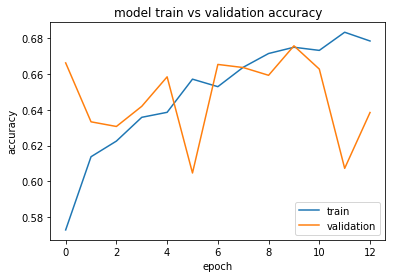

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.69      0.29      0.41       364
          2       0.63      0.93      0.75       680

avg / total       0.59      0.64      0.57      1156

Fit LSTM Course DDD - 3 Target Classes - Decile2
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 20s 7ms/step - loss: 0.8245 - acc: 0.6162 - val_loss: 0.7981 - val_acc: 0.6626
Epoch 2/4000
2866/2866 [==============================] - 12s 4ms/step - loss: 0.7433 - acc: 0.6692 - val_loss: 0.9556 - val_acc: 0.6349
Epoch 3/4000
2866/2866 [==============================] - 12s 4ms/step - loss: 0.7280 - acc: 0.6752 - val_loss: 0.8562 - val_acc: 0.6471
Epoch 4/4000
2866/2866 [==================

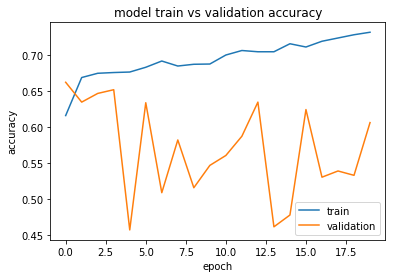

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.25      0.37      0.30       112
          1       0.72      0.38      0.49       364
          2       0.65      0.77      0.71       680

avg / total       0.63      0.61      0.60      1156

Fit LSTM Course DDD - 3 Target Classes - Decile3
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 20s 7ms/step - loss: 0.7969 - acc: 0.6497 - val_loss: 0.8400 - val_acc: 0.6557
Epoch 2/4000
2866/2866 [==============================] - 13s 4ms/step - loss: 0.7213 - acc: 0.6734 - val_loss: 0.7934 - val_acc: 0.6661
Epoch 3/4000
2866/2866 [==============================] - 13s 4ms/step - loss: 0.6984 - acc: 0.6867 - val_loss: 0.7835 - val_acc: 0.6644
Epoch 4/4000
2866/2866 [==================

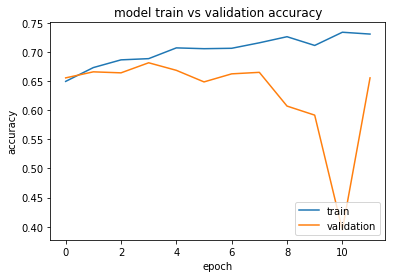

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.38      0.11      0.17       112
          1       0.91      0.26      0.40       364
          2       0.64      0.96      0.77       680

avg / total       0.70      0.66      0.59      1156

Fit LSTM Course DDD - 3 Target Classes - Decile4
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 21s 7ms/step - loss: 0.7757 - acc: 0.6486 - val_loss: 0.8229 - val_acc: 0.6678
Epoch 2/4000
2866/2866 [==============================] - 14s 5ms/step - loss: 0.6736 - acc: 0.7107 - val_loss: 0.7553 - val_acc: 0.6574
Epoch 3/4000
2866/2866 [==============================] - 14s 5ms/step - loss: 0.6489 - acc: 0.7174 - val_loss: 0.7511 - val_acc: 0.6903
Epoch 4/4000
2866/2866 [==================

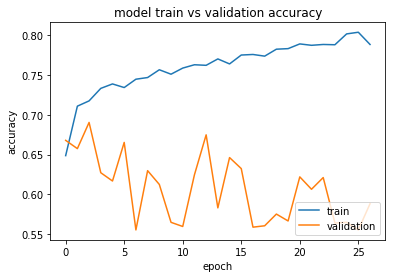

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.21      0.40      0.27       112
          1       0.77      0.41      0.53       364
          2       0.65      0.71      0.68       680

avg / total       0.65      0.59      0.60      1156

Fit LSTM Course DDD - 3 Target Classes - Decile5
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 23s 8ms/step - loss: 0.7488 - acc: 0.6727 - val_loss: 0.6965 - val_acc: 0.7050
Epoch 2/4000
2866/2866 [==============================] - 15s 5ms/step - loss: 0.6366 - acc: 0.7237 - val_loss: 0.7724 - val_acc: 0.6894
Epoch 3/4000
2866/2866 [==============================] - 15s 5ms/step - loss: 0.6169 - acc: 0.7415 - val_loss: 0.6863 - val_acc: 0.7111
Epoch 4/4000
2866/2866 [==================

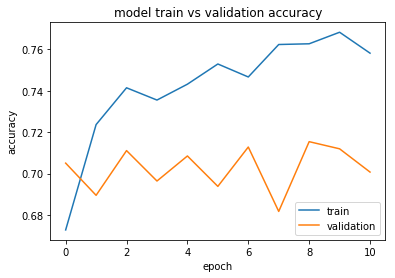

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.21      0.06      0.10       112
          1       0.85      0.47      0.60       364
          2       0.69      0.93      0.79       680

avg / total       0.69      0.70      0.66      1156

Fit LSTM Course DDD - 3 Target Classes - Decile6
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 23s 8ms/step - loss: 0.7402 - acc: 0.6825 - val_loss: 0.8106 - val_acc: 0.7085
Epoch 2/4000
2866/2866 [==============================] - 16s 5ms/step - loss: 0.6227 - acc: 0.7299 - val_loss: 0.7806 - val_acc: 0.6877
Epoch 3/4000
2866/2866 [==============================] - 16s 5ms/step - loss: 0.5950 - acc: 0.7383 - val_loss: 0.7076 - val_acc: 0.7016
Epoch 4/4000
2866/2866 [==================

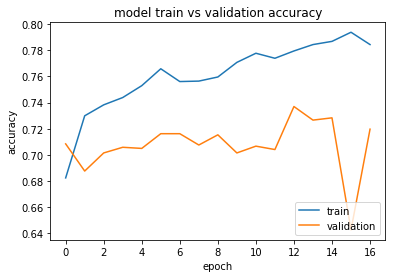

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.43      0.17      0.24       112
          1       0.90      0.48      0.62       364
          2       0.70      0.94      0.80       680

avg / total       0.73      0.72      0.69      1156

Fit LSTM Course DDD - 3 Target Classes - Decile7
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 24s 9ms/step - loss: 0.7435 - acc: 0.6766 - val_loss: 0.7202 - val_acc: 0.7137
Epoch 2/4000
2866/2866 [==============================] - 16s 6ms/step - loss: 0.5959 - acc: 0.7474 - val_loss: 0.6181 - val_acc: 0.7379
Epoch 3/4000
2866/2866 [==============================] - 16s 6ms/step - loss: 0.5636 - acc: 0.7561 - val_loss: 0.6115 - val_acc: 0.7362
Epoch 4/4000
2866/2866 [==================

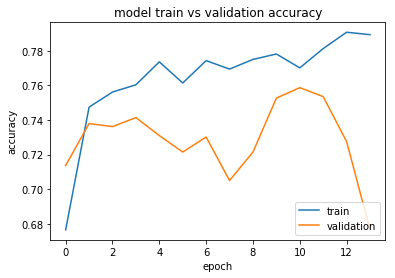

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.31      0.61      0.41       112
          1       0.93      0.51      0.66       364
          2       0.71      0.78      0.75       680

avg / total       0.74      0.68      0.69      1156

Fit LSTM Course DDD - 3 Target Classes - Decile8
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 25s 9ms/step - loss: 0.7134 - acc: 0.6804 - val_loss: 0.7786 - val_acc: 0.6678
Epoch 2/4000
2866/2866 [==============================] - 18s 6ms/step - loss: 0.5789 - acc: 0.7526 - val_loss: 0.7221 - val_acc: 0.7189
Epoch 3/4000
2866/2866 [==============================] - 18s 6ms/step - loss: 0.5534 - acc: 0.7599 - val_loss: 1.1438 - val_acc: 0.6540
Epoch 4/4000
2866/2866 [==================

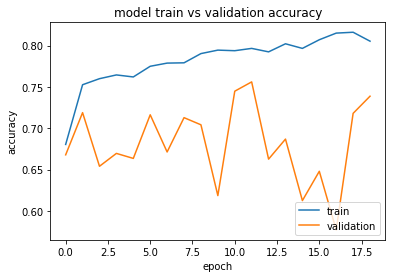

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.36      0.23      0.28       112
          1       0.89      0.61      0.72       364
          2       0.73      0.89      0.80       680

avg / total       0.74      0.74      0.73      1156

Fit LSTM Course DDD - 3 Target Classes - Decile9
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 26s 9ms/step - loss: 0.6887 - acc: 0.7052 - val_loss: 0.6655 - val_acc: 0.7318
Epoch 2/4000
2866/2866 [==============================] - 18s 6ms/step - loss: 0.5600 - acc: 0.7554 - val_loss: 0.6340 - val_acc: 0.7292
Epoch 3/4000
2866/2866 [==============================] - 18s 6ms/step - loss: 0.5285 - acc: 0.7742 - val_loss: 0.5841 - val_acc: 0.7561
Epoch 4/4000
2866/2866 [==================

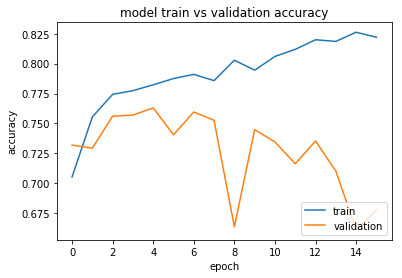

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.25      0.46      0.32       112
          1       0.82      0.71      0.76       364
          2       0.75      0.69      0.72       680

avg / total       0.72      0.68      0.70      1156

Fit LSTM Course DDD - 3 Target Classes - Decile10
Train on 2866 samples, validate on 1156 samples
Epoch 1/4000
2866/2866 [==============================] - 27s 10ms/step - loss: 0.6416 - acc: 0.7240 - val_loss: 0.5441 - val_acc: 0.7803
Epoch 2/4000
2866/2866 [==============================] - 19s 7ms/step - loss: 0.4777 - acc: 0.8039 - val_loss: 0.4592 - val_acc: 0.7881
Epoch 3/4000
2866/2866 [==============================] - 19s 7ms/step - loss: 0.4337 - acc: 0.8084 - val_loss: 0.4281 - val_acc: 0.8166
Epoch 4/4000
2866/2866 [================

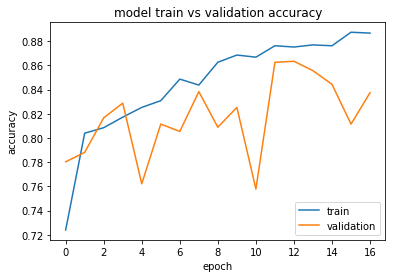

-------------------------------------------
Test LSTM Course DDD - 3 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.72      0.43      0.54       112
          1       0.97      0.74      0.84       364
          2       0.80      0.96      0.87       680

avg / total       0.85      0.84      0.83      1156



In [49]:
for i in Deciles:
    
    LSTM_input = Input(shape=(i+1,3), name='LSTM_input')
    LSTM_out = LSTM(32)(LSTM_input)

    auxiliary_input = Input(shape=(29,), name='aux_input')
    auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
    auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

    x = keras.layers.concatenate([LSTM_out, auxiliary_output])

    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    main_output = Dense(3, activation='softmax', name='main_output')(x)

    DDD_model_names[i] = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
    DDD_model_names[i].compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
     # Fit model for each timestep
    ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course DDD - 3 Target Classes - Decile' + str(i))
    
    history = DDD_model_names[i].fit([DDD_Train_set[i],DDD_AUX_Train], DDD_Train_Targets_1HE, epochs=4000, batch_size=1, verbose=1,
                                     validation_data = ([DDD_Test_set[i], DDD_AUX_Test], DDD_Test_Targets_1HE), callbacks = [ES])
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    y_pred_DDD = DDD_model_names[i].predict([DDD_Test_set[i], DDD_AUX_Test])
    y_classes_DDD = np.argmax(y_pred_DDD,axis=1)

    
    print('-------------------------------------------')
    print('Test LSTM Course DDD - 3 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
    print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))
    

## LSTM Course FFF

In [34]:
Deciles = np.arange(11)
FFF_model_names = ["modelFFF0", "modelFFF1", "modelFFF2", "modelFFF3", "modelFFF4", "modelFFF5",
                   "modelFFF6", "modelFFF7", "modelFFF8", "modelFFF9", "modelFFF10"]
FFF_names = ["FFF0", "FFF1", "FFF2", "FFF3", "FFF4", "FFF5", "FFF6", "FFF7", "FFF8", "FFF9", "FFF10"]
FFF_Train_set = [FFF_Train_3D_Decile0,FFF_Train_3D_Decile1,FFF_Train_3D_Decile2,FFF_Train_3D_Decile3,FFF_Train_3D_Decile4,
                 FFF_Train_3D_Decile5,FFF_Train_3D_Decile6,FFF_Train_3D_Decile7,FFF_Train_3D_Decile8,FFF_Train_3D_Decile9,
                 FFF_Train_3D]
FFF_Test_set = [FFF_Test_3D_Decile0,FFF_Test_3D_Decile1,FFF_Test_3D_Decile2,FFF_Test_3D_Decile3,FFF_Test_3D_Decile4,
                 FFF_Test_3D_Decile5,FFF_Test_3D_Decile6,FFF_Test_3D_Decile7,FFF_Test_3D_Decile8,FFF_Test_3D_Decile9,
                 FFF_Test_3D]

Fit LSTM Course FFF - 3 Target Classes - Decile0
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 9s 2ms/step - loss: 0.9344 - acc: 0.5537 - val_loss: 0.9807 - val_acc: 0.5497
Epoch 2/5
3849/3849 [==============================] - 7s 2ms/step - loss: 0.9091 - acc: 0.5664 - val_loss: 0.9662 - val_acc: 0.5497
Epoch 3/5
3849/3849 [==============================] - 7s 2ms/step - loss: 0.8999 - acc: 0.5713 - val_loss: 0.9727 - val_acc: 0.5411
Epoch 4/5
3849/3849 [==============================] - 7s 2ms/step - loss: 0.8910 - acc: 0.5817 - val_loss: 0.9887 - val_acc: 0.5232
Epoch 5/5
3849/3849 [==============================] - 7s 2ms/step - loss: 0.8785 - acc: 0.5926 - val_loss: 1.0467 - val_acc: 0.5179


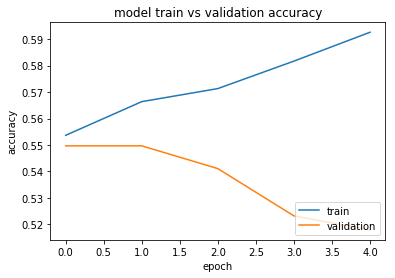

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       258
          1       0.36      0.39      0.37       393
          2       0.58      0.73      0.65       859

avg / total       0.42      0.52      0.47      1510



C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fit LSTM Course FFF - 3 Target Classes - Decile1
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 10s 3ms/step - loss: 0.8856 - acc: 0.5908 - val_loss: 0.8972 - val_acc: 0.5914
Epoch 2/5
3849/3849 [==============================] - 8s 2ms/step - loss: 0.8250 - acc: 0.6220 - val_loss: 0.8986 - val_acc: 0.5775
Epoch 3/5
3849/3849 [==============================] - 8s 2ms/step - loss: 0.8139 - acc: 0.6383 - val_loss: 0.9222 - val_acc: 0.5748
Epoch 4/5
3849/3849 [==============================] - 8s 2ms/step - loss: 0.8036 - acc: 0.6345 - val_loss: 0.9154 - val_acc: 0.5728
Epoch 5/5
3849/3849 [==============================] - 8s 2ms/step - loss: 0.7947 - acc: 0.6407 - val_loss: 0.9712 - val_acc: 0.5649


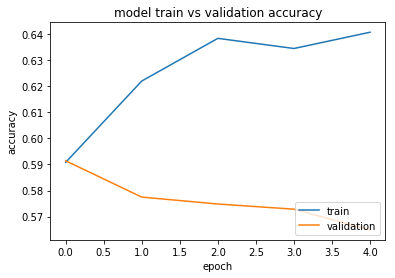

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.33      0.00      0.01       258
          1       0.47      0.42      0.45       393
          2       0.59      0.80      0.68       859

avg / total       0.52      0.56      0.50      1510

Fit LSTM Course FFF - 3 Target Classes - Decile2
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 11s 3ms/step - loss: 0.8357 - acc: 0.6259 - val_loss: 0.8210 - val_acc: 0.6166
Epoch 2/5
3849/3849 [==============================] - 9s 2ms/step - loss: 0.7653 - acc: 0.6555 - val_loss: 0.8424 - val_acc: 0.6219
Epoch 3/5
3849/3849 [==============================] - 9s 2ms/step - loss: 0.7478 - acc: 0.6586 - val_loss: 0.9621 - val_acc: 0.6258
Epoch 4/5
3849/3849 [==============================] 

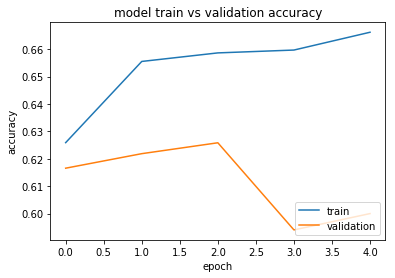

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       258
          1       0.56      0.53      0.54       393
          2       0.61      0.81      0.70       859

avg / total       0.49      0.60      0.54      1510

Fit LSTM Course FFF - 3 Target Classes - Decile3
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 13s 4ms/step - loss: 0.8117 - acc: 0.6324 - val_loss: 0.7767 - val_acc: 0.6477
Epoch 2/5
3849/3849 [==============================] - 12s 3ms/step - loss: 0.7302 - acc: 0.6573 - val_loss: 0.7836 - val_acc: 0.6377
Epoch 3/5
3849/3849 [==============================] - 11s 3ms/step - loss: 0.7132 - acc: 0.6737 - val_loss: 0.7328 - val_acc: 0.6589
Epoch 4/5
3849/3849 [==============================

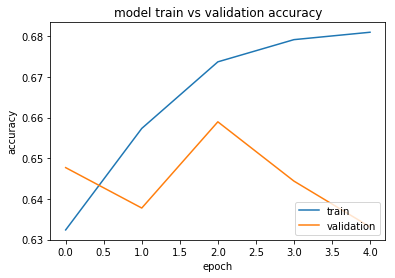

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.78      0.03      0.05       258
          1       0.90      0.26      0.41       393
          2       0.61      0.98      0.75       859

avg / total       0.71      0.63      0.54      1510

Fit LSTM Course FFF - 3 Target Classes - Decile4
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 14s 4ms/step - loss: 0.7892 - acc: 0.6417 - val_loss: 0.8197 - val_acc: 0.6291
Epoch 2/5
3849/3849 [==============================] - 13s 3ms/step - loss: 0.7029 - acc: 0.6776 - val_loss: 0.7218 - val_acc: 0.6781
Epoch 3/5
3849/3849 [==============================] - 13s 3ms/step - loss: 0.6890 - acc: 0.6872 - val_loss: 0.7045 - val_acc: 0.6788
Epoch 4/5
3849/3849 [==============================

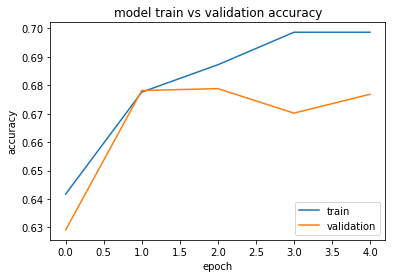

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.56      0.46      0.51       258
          1       0.77      0.48      0.59       393
          2       0.68      0.83      0.75       859

avg / total       0.68      0.68      0.67      1510

Fit LSTM Course FFF - 3 Target Classes - Decile5
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 14s 4ms/step - loss: 0.7560 - acc: 0.6643 - val_loss: 0.7393 - val_acc: 0.6550
Epoch 2/5
3849/3849 [==============================] - 12s 3ms/step - loss: 0.6581 - acc: 0.7103 - val_loss: 0.6797 - val_acc: 0.6854
Epoch 3/5
3849/3849 [==============================] - 13s 3ms/step - loss: 0.6181 - acc: 0.7194 - val_loss: 0.6202 - val_acc: 0.7073
Epoch 4/5
3849/3849 [==============================

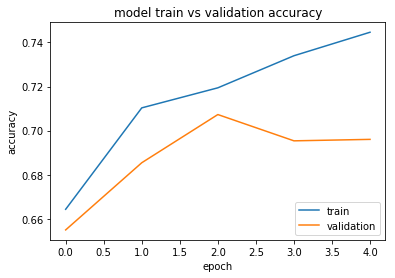

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.02      0.05       258
          1       0.88      0.55      0.68       393
          2       0.66      0.96      0.78       859

avg / total       0.77      0.70      0.63      1510

Fit LSTM Course FFF - 3 Target Classes - Decile6
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 16s 4ms/step - loss: 0.7278 - acc: 0.6784 - val_loss: 0.6910 - val_acc: 0.7033
Epoch 2/5
3849/3849 [==============================] - 14s 4ms/step - loss: 0.6118 - acc: 0.7412 - val_loss: 0.7897 - val_acc: 0.6570
Epoch 3/5
3849/3849 [==============================] - 15s 4ms/step - loss: 0.5673 - acc: 0.7571 - val_loss: 0.5687 - val_acc: 0.7325
Epoch 4/5
3849/3849 [==============================

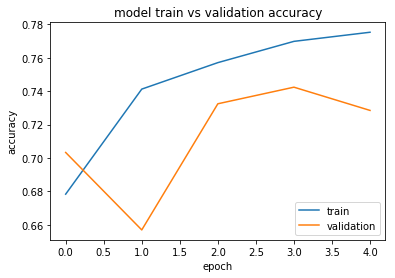

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.84      0.08      0.15       258
          1       0.91      0.63      0.75       393
          2       0.68      0.97      0.80       859

avg / total       0.77      0.73      0.68      1510

Fit LSTM Course FFF - 3 Target Classes - Decile7
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 17s 5ms/step - loss: 0.7187 - acc: 0.6799 - val_loss: 0.7553 - val_acc: 0.6914
Epoch 2/5
3849/3849 [==============================] - 14s 4ms/step - loss: 0.5847 - acc: 0.7436 - val_loss: 0.6206 - val_acc: 0.7066
Epoch 3/5
3849/3849 [==============================] - 15s 4ms/step - loss: 0.5314 - acc: 0.7636 - val_loss: 0.7784 - val_acc: 0.6649
Epoch 4/5
3849/3849 [==============================

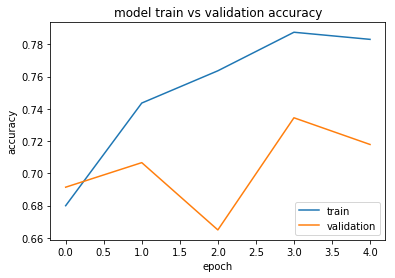

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.82      0.16      0.26       258
          1       0.97      0.51      0.67       393
          2       0.67      0.98      0.80       859

avg / total       0.77      0.72      0.67      1510

Fit LSTM Course FFF - 3 Target Classes - Decile8
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 18s 5ms/step - loss: 0.6749 - acc: 0.7223 - val_loss: 0.7112 - val_acc: 0.6940
Epoch 2/5
3849/3849 [==============================] - 15s 4ms/step - loss: 0.5338 - acc: 0.7815 - val_loss: 0.5487 - val_acc: 0.7450
Epoch 3/5
3849/3849 [==============================] - 16s 4ms/step - loss: 0.4823 - acc: 0.7950 - val_loss: 0.7154 - val_acc: 0.6563
Epoch 4/5
3849/3849 [==============================

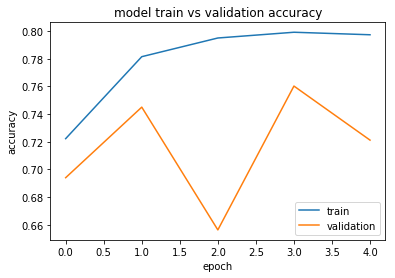

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.69      0.24      0.35       258
          1       0.72      0.81      0.76       393
          2       0.72      0.83      0.77       859

avg / total       0.72      0.72      0.70      1510

Fit LSTM Course FFF - 3 Target Classes - Decile9
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 20s 5ms/step - loss: 0.6528 - acc: 0.7319 - val_loss: 0.6371 - val_acc: 0.7397
Epoch 2/5
3849/3849 [==============================] - 17s 5ms/step - loss: 0.5248 - acc: 0.7805 - val_loss: 0.6391 - val_acc: 0.7364
Epoch 3/5
3849/3849 [==============================] - 18s 5ms/step - loss: 0.4811 - acc: 0.7911 - val_loss: 0.4741 - val_acc: 0.7795
Epoch 4/5
3849/3849 [==============================

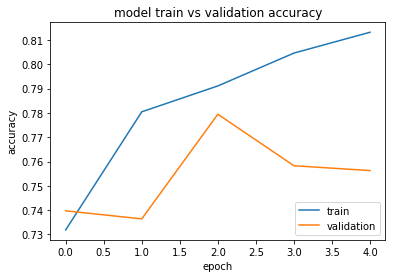

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.75      0.38      0.51       258
          1       0.72      0.88      0.79       393
          2       0.77      0.81      0.79       859

avg / total       0.76      0.76      0.74      1510

Fit LSTM Course FFF - 3 Target Classes - Decile10
Train on 3849 samples, validate on 1510 samples
Epoch 1/5
3849/3849 [==============================] - 20s 5ms/step - loss: 0.6060 - acc: 0.7576 - val_loss: 0.5592 - val_acc: 0.7589
Epoch 2/5
3849/3849 [==============================] - 19s 5ms/step - loss: 0.4732 - acc: 0.7973 - val_loss: 0.5175 - val_acc: 0.7656
Epoch 3/5
3849/3849 [==============================] - 19s 5ms/step - loss: 0.4347 - acc: 0.8127 - val_loss: 0.5295 - val_acc: 0.7901
Epoch 4/5
3849/3849 [=============================

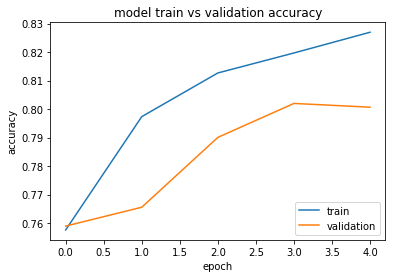

-------------------------------------------
Test LSTM Course FFF - 3 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.62      0.69      0.65       258
          1       0.86      0.85      0.86       393
          2       0.84      0.81      0.82       859

avg / total       0.81      0.80      0.80      1510



In [35]:
for i in Deciles:
    
    LSTM_input = Input(shape=(i+1,3), name='LSTM_input')
    LSTM_out = LSTM(32)(LSTM_input)

    auxiliary_input = Input(shape=(29,), name='aux_input')
    auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
    auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

    x = keras.layers.concatenate([LSTM_out, auxiliary_output])

    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    main_output = Dense(3, activation='softmax', name='main_output')(x)

    FFF_model_names[i] = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
    FFF_model_names[i].compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
     # Fit model for each timestep
    ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course FFF - 3 Target Classes - Decile' + str(i))
    
    history = FFF_model_names[i].fit([FFF_Train_set[i],FFF_AUX_Train], FFF_Train_Targets_1HE, epochs=5, batch_size=1, verbose=1,
                                     validation_data = ([FFF_Test_set[i], FFF_AUX_Test], FFF_Test_Targets_1HE), callbacks = [ES])
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    y_pred_FFF = FFF_model_names[i].predict([FFF_Test_set[i], FFF_AUX_Test])
    y_classes_FFF = np.argmax(y_pred_FFF,axis=1)

    
    print('-------------------------------------------')
    print('Test LSTM Course FFF - 3 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
    print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))
    

# Alternative approach: model every timestep individually

# LSTM Course BBB

In [27]:
LSTM_input = Input(shape=(11,3), name='LSTM_input')
LSTM_out = LSTM(32)(LSTM_input)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])

x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(3, activation='softmax', name='main_output')(x)

model = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics = ['accuracy'])

In [103]:
#auxiliary_input = Input(shape=(29,), name='aux_input')
#auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
#auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

#main_output = Dense(3, activation='softmax', name='main_output')(auxiliary_output)

#model = Model(inputs=auxiliary_input, outputs=main_output)
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics = ['accuracy'])

<tf.Tensor 'lstm_14/TensorArrayReadV3:0' shape=(?, 32) dtype=float32>

### Train LSTM Course BBB

In [64]:
model.fit(x=[BBB_Train_3D,BBB_AUX_Train], y=BBB_Train_Targets_1HE, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3978/3978 [==============================] - 2s 519us/step - loss: 1.3343 - acc: 0.4837
Epoch 2/20
3978/3978 [==============================] - 1s 221us/step - loss: 0.9199 - acc: 0.5882
Epoch 3/20
3978/3978 [==============================] - 1s 211us/step - loss: 0.7821 - acc: 0.6518
Epoch 4/20
3978/3978 [==============================] - 1s 235us/step - loss: 0.6934 - acc: 0.6978
Epoch 5/20
3978/3978 [==============================] - 1s 225us/step - loss: 0.6469 - acc: 0.7270
Epoch 6/20
3978/3978 [==============================] - 1s 239us/step - loss: 0.6096 - acc: 0.7443
Epoch 7/20
3978/3978 [==============================] - 1s 232us/step - loss: 0.6032 - acc: 0.7401
Epoch 8/20
3978/3978 [==============================] - 1s 222us/step - loss: 0.5798 - acc: 0.7481
Epoch 9/20
3978/3978 [==============================] - 1s 214us/step - loss: 0.5711 - acc: 0.7539
Epoch 10/20
3978/3978 [==============================] - 1s 202us/step - loss: 0.5549 - acc: 0.7624
Epoch 11/

### Test LSTM Course BBB

In [65]:
y_pred_BBB = model.predict([BBB_Test_3D, BBB_AUX_Test])
y_classes_BBB = np.argmax(y_pred_BBB,axis=1)
y_classes_BBB

array([2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2,

In [66]:
print('Course BBB - 3 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))


Course BBB - 3 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.63      0.13      0.22       180
          1       0.47      0.87      0.61       391
          2       0.75      0.60      0.67       972

avg / total       0.67      0.62      0.60      1543



# LSTM COURSE DDD

### Train LSTM Course DDD

In [67]:
model.fit([DDD_Train_3D,DDD_AUX_Train], DDD_Train_Targets_1HE, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
2866/2866 [==============================] - 1s 219us/step - loss: 0.4778 - acc: 0.8018
Epoch 2/20
2866/2866 [==============================] - 1s 229us/step - loss: 0.4594 - acc: 0.8070
Epoch 3/20
2866/2866 [==============================] - 1s 238us/step - loss: 0.4415 - acc: 0.8081
Epoch 4/20
2866/2866 [==============================] - 1s 216us/step - loss: 0.4250 - acc: 0.8158
Epoch 5/20
2866/2866 [==============================] - 1s 215us/step - loss: 0.4263 - acc: 0.8133
Epoch 6/20
2866/2866 [==============================] - 1s 221us/step - loss: 0.4175 - acc: 0.8193
Epoch 7/20
2866/2866 [==============================] - 1s 229us/step - loss: 0.4137 - acc: 0.8262
Epoch 8/20
2866/2866 [==============================] - 1s 260us/step - loss: 0.3995 - acc: 0.8255
Epoch 9/20
2866/2866 [==============================] - 1s 235us/step - loss: 0.3963 - acc: 0.8329
Epoch 10/20
2866/2866 [==============================] - 1s 223us/step - loss: 0.3927 - acc: 0.8241
Epoch 11/

### Test LSTM Course DDD

In [68]:
y_pred_DDD = model.predict([DDD_Test_3D, DDD_AUX_Test])
y_classes_DDD = np.argmax(y_pred_DDD,axis=1)
y_classes_DDD

array([2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1,

In [69]:
print('Course DDD - 3 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))


Course DDD - 3 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.80      0.11      0.19       112
          1       0.76      0.87      0.81       364
          2       0.80      0.85      0.82       680

avg / total       0.78      0.78      0.76      1156



# LSTM COURSE FFF

### Train LSTM Course FFF

In [29]:
model.fit([FFF_Train_3D,FFF_AUX_Train], FFF_Train_Targets_1HE, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3849/3849 [==============================] - 2s 466us/step - loss: 0.8398 - acc: 0.6654
Epoch 2/20
3849/3849 [==============================] - 1s 197us/step - loss: 0.6023 - acc: 0.7924
Epoch 3/20
3849/3849 [==============================] - 1s 199us/step - loss: 0.5523 - acc: 0.7968
Epoch 4/20
3849/3849 [==============================] - 1s 204us/step - loss: 0.5007 - acc: 0.8072
Epoch 5/20
3849/3849 [==============================] - 1s 222us/step - loss: 0.4758 - acc: 0.8062
Epoch 6/20
3849/3849 [==============================] - 1s 204us/step - loss: 0.4512 - acc: 0.8109
Epoch 7/20
3849/3849 [==============================] - 1s 205us/step - loss: 0.4299 - acc: 0.8132
Epoch 8/20
3849/3849 [==============================] - 1s 205us/step - loss: 0.4145 - acc: 0.8231
Epoch 9/20
3849/3849 [==============================] - 1s 201us/step - loss: 0.4158 - acc: 0.8187
Epoch 10/20
3849/3849 [==============================] - 1s 234us/step - loss: 0.4026 - acc: 0.8249
Epoch 11/

### Test LSTM Course FFF

In [30]:
y_pred_FFF = model.predict([FFF_Test_3D, FFF_AUX_Test])
y_classes_FFF = np.argmax(y_pred_FFF,axis=1)
y_classes_FFF

array([1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1,
       1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1,
       2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2,

In [31]:
print('Course FFF - 3 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))


Course FFF - 3 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.59      0.82      0.69       258
          1       0.93      0.83      0.88       393
          2       0.86      0.80      0.83       859

avg / total       0.83      0.81      0.82      1510



Epoch 1/20
3849/3849 [==============================] - 1s 370us/step - loss: 1.1211 - acc: 0.4838
Epoch 2/20
3849/3849 [==============================] - 0s 49us/step - loss: 1.0425 - acc: 0.5123
Epoch 3/20
3849/3849 [==============================] - 0s 63us/step - loss: 1.0263 - acc: 0.5110
Epoch 4/20
3849/3849 [==============================] - 0s 49us/step - loss: 1.0196 - acc: 0.5168
Epoch 5/20
3849/3849 [==============================] - 0s 48us/step - loss: 0.9916 - acc: 0.5386
Epoch 6/20
3849/3849 [==============================] - 0s 71us/step - loss: 1.0018 - acc: 0.5313
Epoch 7/20
3849/3849 [==============================] - 0s 50us/step - loss: 0.9949 - acc: 0.5404
Epoch 8/20
3849/3849 [==============================] - 0s 54us/step - loss: 0.9829 - acc: 0.5412
Epoch 9/20
3849/3849 [==============================] - 0s 53us/step - loss: 0.9683 - acc: 0.5459
Epoch 10/20
3849/3849 [==============================] - 0s 54us/step - loss: 0.9707 - acc: 0.5456
Epoch 11/20
3849/3